### Import libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#Load dataset

data = pd.read_csv("../Dataset/bank_data_C.csv")
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
data.describe(include = 'all')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [6]:
data.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [7]:
#Creating a folder for visualization

output_dir = os.path.join(os.path.dirname(os.getcwd()), 'visualization')
os.makedirs(output_dir, exist_ok= True)

### Data Cleaning & Features Engineering

In [9]:
data.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [10]:
#Checking for missing value

data.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [11]:
#Convert CustomerDOB and transaction date to datetime

data["CustomerDOB"] = pd.to_datetime(data["CustomerDOB"])
data["TransactionDate"] = pd.to_datetime(data["TransactionDate"], format = '%d/%m/%y')

C:\Users\Williams\AppData\Local\Temp\ipykernel_3480\4069038353.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["CustomerDOB"] = pd.to_datetime(data["CustomerDOB"])


In [12]:
#Checking for unique value
data["TransactionDate"].unique()

<DatetimeArray>
['2016-08-02 00:00:00', '2016-08-01 00:00:00', '2016-08-03 00:00:00',
 '2016-08-05 00:00:00', '2016-08-04 00:00:00', '2016-08-06 00:00:00',
 '2016-08-09 00:00:00', '2016-08-08 00:00:00', '2016-08-12 00:00:00',
 '2016-08-07 00:00:00', '2016-10-21 00:00:00', '2016-10-16 00:00:00',
 '2016-08-10 00:00:00', '2016-08-14 00:00:00', '2016-08-17 00:00:00',
 '2016-08-21 00:00:00', '2016-08-19 00:00:00', '2016-08-24 00:00:00',
 '2016-08-22 00:00:00', '2016-08-29 00:00:00', '2016-08-31 00:00:00',
 '2016-09-22 00:00:00', '2016-09-23 00:00:00', '2016-08-13 00:00:00',
 '2016-08-25 00:00:00', '2016-08-28 00:00:00', '2016-08-15 00:00:00',
 '2016-08-27 00:00:00', '2016-08-20 00:00:00', '2016-08-23 00:00:00',
 '2016-08-30 00:00:00', '2016-08-11 00:00:00', '2016-08-16 00:00:00',
 '2016-08-26 00:00:00', '2016-09-27 00:00:00', '2016-08-18 00:00:00',
 '2016-09-25 00:00:00', '2016-09-26 00:00:00', '2016-09-30 00:00:00',
 '2016-09-03 00:00:00', '2016-09-02 00:00:00', '2016-09-01 00:00:00',
 '20

In [13]:
#Calculating the age of every customer by subtracting the transaction date from DOB
#We first create a new column for age

def calculate_age(data):
    data['Age'] = data["TransactionDate"].dt.year - data["CustomerDOB"].dt.year
    return data

In [14]:
data = calculate_age(data)
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,-57
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


In [15]:
#Observe and correct Customers negative age
data[data["Age"] < 0]["CustomerDOB"]

1         2057-04-04
3         2073-09-14
5         2072-08-10
15        2068-10-07
29        2067-01-21
             ...    
1041553   2070-09-20
1041557   2048-07-15
1041583   2033-05-10
1041591   2071-05-10
1041599   2071-08-21
Name: CustomerDOB, Length: 104834, dtype: datetime64[ns]

In [16]:
#Define a function to correct a negative age by adjusting the date of the year

def adjust_year(date):
    if date.year>2016:
        date = date.replace(year= date.year - 100)
    return date

In [17]:
data["CustomerDOB"] = data["CustomerDOB"].apply(adjust_year)

In [18]:
data = calculate_age(data)

In [19]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


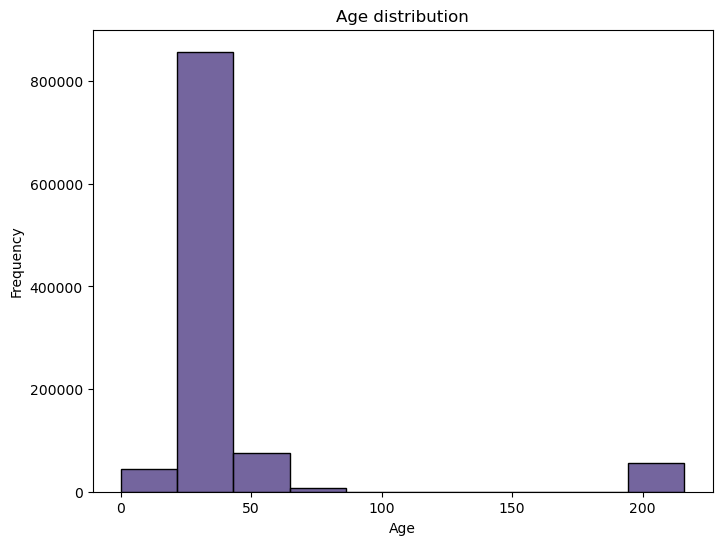

In [20]:
#To observe age distribution 
plt.figure(figsize=(8,6))
sns.set_palette("viridis")
sns.histplot(data['Age'], bins = 10, kde = False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.show()

In [21]:
#examine the wrong entry
data[data["Age"] > 100]["CustomerDOB"].unique()

<DatetimeArray>
['1800-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]

In [22]:
#Removing the outliers as a result of wrong entries
#Define function to fix outliers in age

def replace_age_outliers(data):
    DOB_threshold = 1900
    age_outliers = data[data["CustomerDOB"].dt.year < DOB_threshold].index

    mean_DOB = data[~data.index.isin(age_outliers)]["CustomerDOB"].mean()

    data.loc[age_outliers, "CustomerDOB"] = mean_DOB

    return data
    

In [23]:
data = replace_age_outliers(data)
data = calculate_age(data)

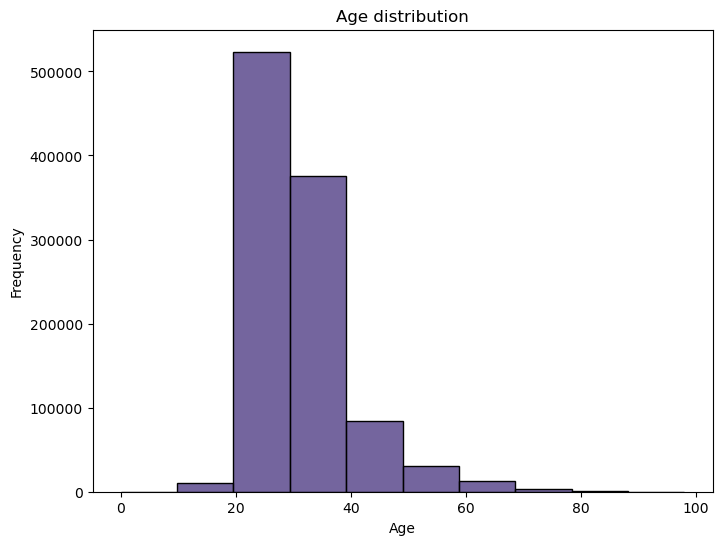

In [24]:
#To observe age distribution 
plt.figure(figsize=(8,6))
sns.histplot(data['Age'], bins = 10, kde = False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.show()

In [25]:
#To observe Gender column

data["CustGender"].value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

In [26]:
#Replace T in gender with M
data["CustGender"] = data["CustGender"].replace('T', 'M')

In [27]:
data["CustGender"].value_counts()

CustGender
M    760979
F    280635
Name: count, dtype: int64

In [28]:
#To observe location column
data["CustLocation"].value_counts()

CustLocation
MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: count, Length: 9275, dtype: int64

In [29]:
#To observe Account balance column
data["CustAccountBalance"].sort_values(ascending = True)

133809             0.0
1017262            0.0
665191             0.0
631012             0.0
242176             0.0
              ...     
995329     115035495.1
40727      115035495.1
994478     115035495.1
829903     115035495.1
873636     115035495.1
Name: CustAccountBalance, Length: 1041614, dtype: float64

In [30]:
#observe transaction amount

data[data["TransactionAmount (INR)"]== 0].value_counts().sum()

820

In [31]:
#Drop all the rows with zero transactions

data.drop(data[data["TransactionAmount (INR)"] == 0].index.tolist(), axis = 0, inplace = True)

In [32]:
data[data["TransactionAmount (INR)"]== 0].value_counts().sum()

0

In [33]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


### Exploratory Data Analysis

In [35]:
#Checking for customer unique ID
data["CustomerID"].nunique()

878763

In [36]:
data.shape

(1040794, 10)

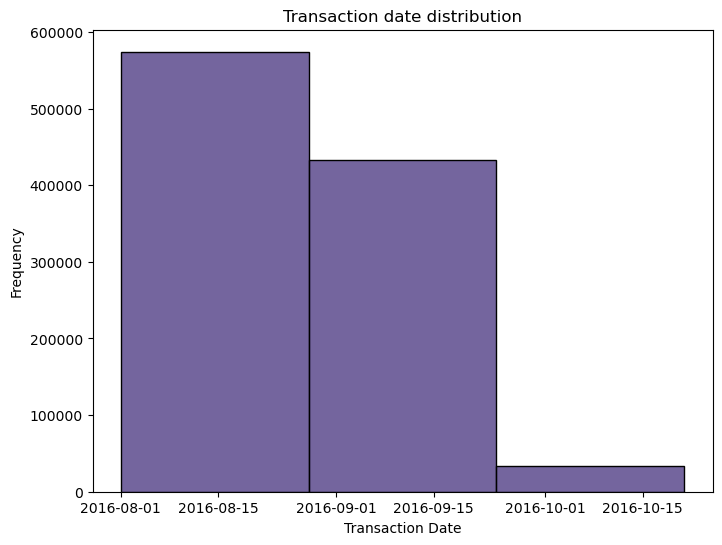

In [37]:
#plot a distribution for data across the unique transaction date
#based on the graph we only have 3 months worth of data

plt.figure(figsize=(8,6))
sns.histplot(data["TransactionDate"], bins = 3, kde = False)
plt.xlabel("Transaction Date")
plt.ylabel("Frequency")
plt.title("Transaction date distribution")
plt.show()

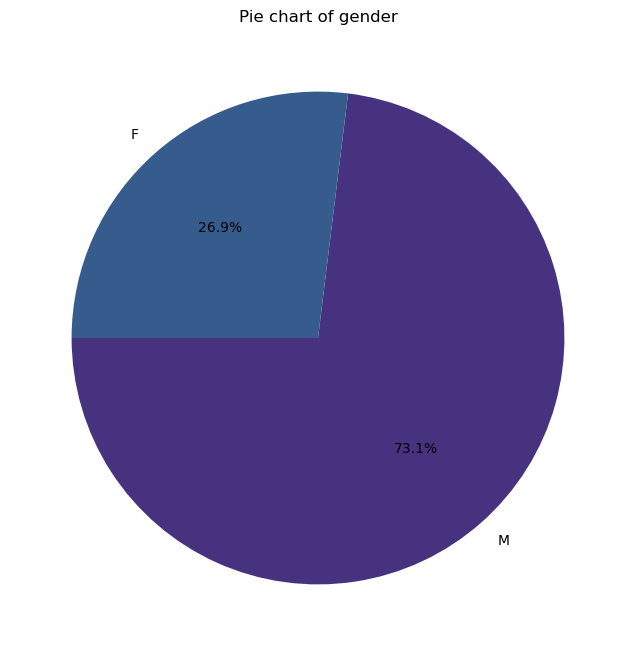

In [38]:
#Checking the distribution for Gender with pie chart

plt.figure(figsize=(8,8))
gender_count = data["CustGender"].value_counts()
plt.pie(gender_count, labels = gender_count.index, autopct= '%1.1f%%', startangle = 180)
plt.title("Pie chart of gender")
plt.show()

### RFM Analysis

In [40]:
data.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


### Recency

In [42]:
#To understand how frequent a customer transact 
#To obtain a maximum day 
day = data["TransactionDate"].max()

In [43]:
day

Timestamp('2016-10-21 00:00:00')

In [44]:
recency = data.groupby(['CustomerID']).agg({"TransactionDate": lambda x: ((day - x.max()).days) +1})

In [45]:
recency.head()

,TransactionDate
CustomerID,
C1010011,26
C1010012,69
C1010014,76
C1010018,37
C1010024,65


### Frequency

In [47]:
#Calculating a transaction ID for every customer

frequency = data.drop_duplicates(subset = "TransactionID").groupby(["CustomerID"])[["TransactionID"]].count()

In [48]:
frequency.head(5)

,TransactionID
CustomerID,
C1010011,2
C1010012,1
C1010014,2
C1010018,1
C1010024,1


### Monetary

In [50]:
#To get the total sum of all the transaction amount made by every customer

monetary = data.groupby("CustomerID")[["TransactionAmount (INR)"]].sum()

In [51]:
monetary.head(5)

,TransactionAmount (INR)
CustomerID,
C1010011,5106.0
C1010012,1499.0
C1010014,1455.0
C1010018,30.0
C1010024,5000.0


### Create RFM table

In [53]:
#Concatenate Every individual table created to create overall RFM table
RFM_Table = pd.concat([recency, frequency, monetary], axis = 1)

In [54]:
RFM_Table.head()

,TransactionDate,TransactionID,TransactionAmount (INR)
CustomerID,,,
C1010011,26,2,5106.0
C1010012,69,1,1499.0
C1010014,76,2,1455.0
C1010018,37,1,30.0
C1010024,65,1,5000.0


In [55]:
#Rename column headings 
RFM_Table = RFM_Table.rename(columns = {"TransactionDate": "Recency", "TransactionID": "Frequency", "TransactionAmount (INR)": "Monetary"})
RFM_Table.head()

,Recency,Frequency,Monetary
CustomerID,,,
C1010011,26,2,5106.0
C1010012,69,1,1499.0
C1010014,76,2,1455.0
C1010018,37,1,30.0
C1010024,65,1,5000.0


### Exploring RFM Table

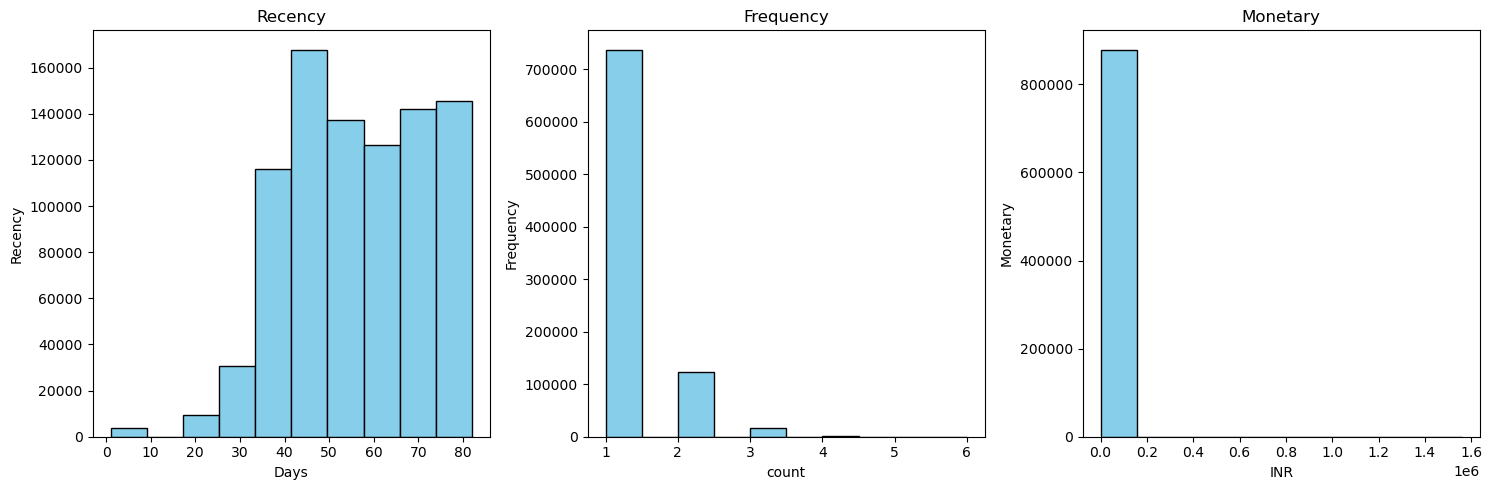

In [57]:
fig, axes = plt.subplots(1,3, figsize= (15,5))

columns = ["Recency", "Frequency", "Monetary"]
for i, col in enumerate(columns):
    axes[i].hist(RFM_Table[col], bins= 10, color = 'skyblue', edgecolor = 'black')
    axes[i].set_title(col)
    axes[i].set_xlabel("Days" if col == "Recency" else "count" if col == "Frequency" else "INR")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()
    

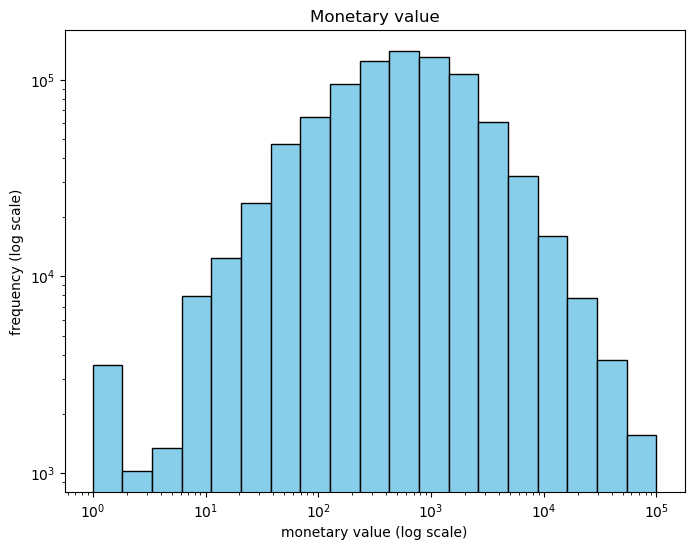

In [58]:
plt.figure(figsize=(8,6))
plt.hist(RFM_Table['Monetary'], bins = np.logspace(0,5,20), color = 'skyblue', edgecolor = 'black')
plt.title("Monetary value")
plt.xlabel('monetary value (log scale)')
plt.ylabel('frequency (log scale)')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [59]:
RFM_Table.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.223293,-0.020675
Frequency,-0.223293,1.000000,0.097491
Monetary,-0.020675,0.097491,1.000000


### Assign RFM Score

In [61]:
RFM_Table.head()

,Recency,Frequency,Monetary
CustomerID,,,
C1010011,26,2,5106.0
C1010012,69,1,1499.0
C1010014,76,2,1455.0
C1010018,37,1,30.0
C1010024,65,1,5000.0


In [62]:
#Calculate the quartile for each column
quantile = RFM_Table[["Recency", "Frequency", "Monetary"]].quantile(q = [0.25, 0.5, 0.75]).to_dict() 

In [63]:
quantile

{'Recency': {0.25: 44.0, 0.5: 56.0, 0.75: 69.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 200.0, 0.5: 534.0, 0.75: 1500.0}}

In [64]:
RFM_Table["Frequency"].value_counts()

Frequency
1    736989
2    123500
3     16460
4      1659
5       141
6        14
Name: count, dtype: int64

In [65]:
#Creating a custom system for frequency

def assign_R_score(x, feature):
    if x <= quantile[feature][0.25]:
        return 4
    elif x <= quantile[feature][0.5]:
        return 3
    elif x <= quantile[feature][0.75]:
        return 3
    else:
        return 1

def assign_M_score(x, feature):
    if x <= quantile[feature][0.25]:
        return 1
    elif x <= quantile[feature][0.5]:
        return 2
    elif x <= quantile[feature][0.75]:
        return 3
    else:
        return 4

In [66]:
def custom_frequency_score(x):
    if x <=3:
        return x
    else:
        return 4

In [67]:
RFM_Table["R_score"] = RFM_Table["Recency"].apply(lambda x: assign_R_score(x, "Recency"))

RFM_Table["F_score"] =  RFM_Table["Frequency"].apply(custom_frequency_score)

RFM_Table["M_score"] = RFM_Table["Monetary"].apply(lambda x: assign_M_score(x, "Monetary"))

In [68]:
RFM_Table

,Recency,Frequency,Monetary,R_score,F_score,M_score
CustomerID,,,,,,
C1010011,26,2,5106.0,4,2,4
C1010012,69,1,1499.0,3,1,3
C1010014,76,2,1455.0,1,2,3
C1010018,37,1,30.0,4,1,1
C1010024,65,1,5000.0,3,1,4
...,...,...,...,...,...,...
C9099836,76,1,691.0,1,1,3
C9099877,37,1,222.0,4,1,2
C9099919,65,1,126.0,3,1,1


In [69]:
#Creating a total score that will be a combination of all 3 scores

RFM_Table["RFM_Score"] = RFM_Table[["R_score", "F_score", "M_score"]].sum(axis=1)

In [70]:
RFM_Table.head(5)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
CustomerID,,,,,,,
C1010011,26,2,5106.0,4,2,4,10
C1010012,69,1,1499.0,3,1,3,7
C1010014,76,2,1455.0,1,2,3,6
C1010018,37,1,30.0,4,1,1,6
C1010024,65,1,5000.0,3,1,4,8


In [71]:
#Creating RFM Group to understand the segment

RFM_Table["RFM_Group"] = RFM_Table["R_score"].astype(str) + RFM_Table["F_score"].astype(str) + RFM_Table["M_score"].astype(str)

In [72]:
RFM_Table.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM_Group
CustomerID,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,424
C1010012,69,1,1499.0,3,1,3,7,313
C1010014,76,2,1455.0,1,2,3,6,123
C1010018,37,1,30.0,4,1,1,6,411
C1010024,65,1,5000.0,3,1,4,8,314


### Customer Segmentation


<Axes: xlabel='RFM_Score', ylabel='count'>

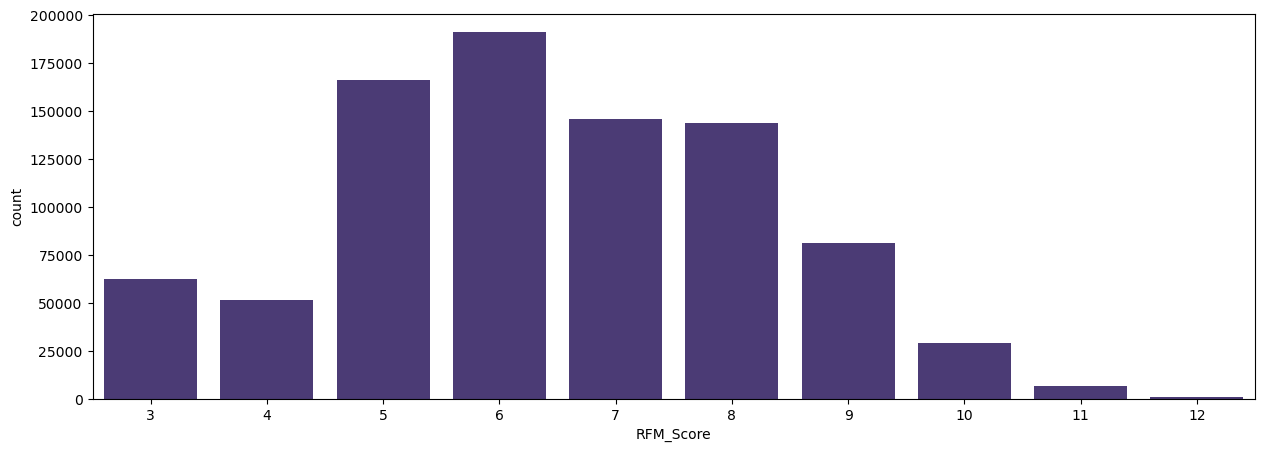

In [74]:
#Visualize the distribution along the RFM_Score

plt.figure(figsize = (15, 5))
sns.countplot(x = RFM_Table["RFM_Score"])

**12 - 10** for high valued customers
**9 - 6** for medium valued customers
**5 - 3** for low valued customers

In [76]:
def assign_segments(x):
    if x <= 5:
        return "low"
    elif x <= 9:
        return "medium"
    else:
        return "high"

In [77]:
RFM_Table["segments"] = RFM_Table["RFM_Score"].apply(lambda x: assign_segments(x))

In [78]:
RFM_Table.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM_Group,segments
CustomerID,,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,424,high
C1010012,69,1,1499.0,3,1,3,7,313,medium
C1010014,76,2,1455.0,1,2,3,6,123,medium
C1010018,37,1,30.0,4,1,1,6,411,medium
C1010024,65,1,5000.0,3,1,4,8,314,medium


<Axes: xlabel='segments', ylabel='count'>

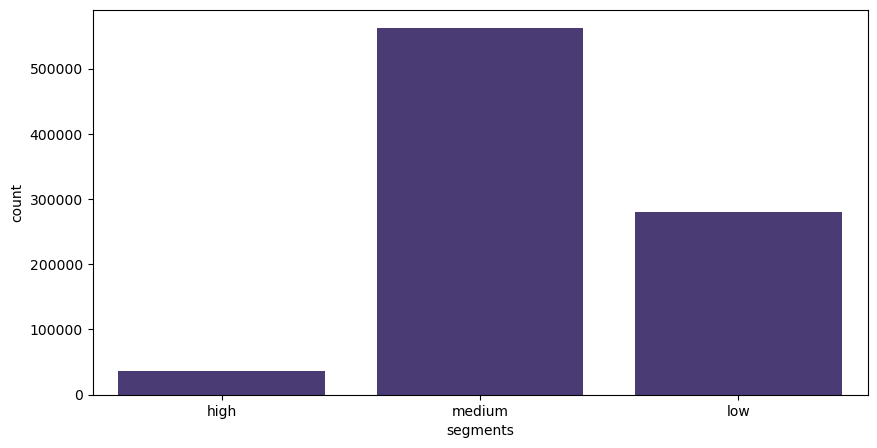

In [79]:
#Visualize the distribution along the segments

plt.figure(figsize = (10, 5))
sns.countplot(x = RFM_Table["segments"])

### Create a weighted RFM score

In [81]:
if "weighted Score" in RFM_Table.columns:
    RFM_Table.drop("weighted Score", axis=1, inplace=True)

RFM_Table["weighted score"] = (RFM_Table['R_score'] * 2) + (RFM_Table['F_score'] * 1) + (RFM_Table['M_score'] * 1)

In [82]:
RFM_Table.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM_Group,segments,weighted score
CustomerID,,,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,424,high,14
C1010012,69,1,1499.0,3,1,3,7,313,medium,10
C1010014,76,2,1455.0,1,2,3,6,123,medium,7
C1010018,37,1,30.0,4,1,1,6,411,medium,10
C1010024,65,1,5000.0,3,1,4,8,314,medium,11


<Axes: xlabel='weighted score', ylabel='count'>

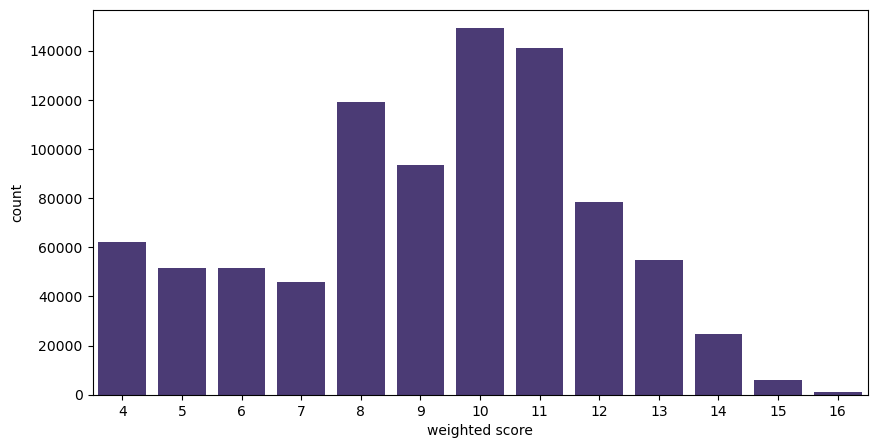

In [83]:
#Visualize weighted_score

plt.figure(figsize = (10, 5))
sns.countplot(x = RFM_Table["weighted score"])

In [84]:
#Creating RFM Weighted segment

RFM_Table["weighted segment"] = RFM_Table["weighted score"].apply(lambda x: assign_segments(x))

In [85]:
RFM_Table.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM_Group,segments,weighted score,weighted segment
CustomerID,,,,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,424,high,14,high
C1010012,69,1,1499.0,3,1,3,7,313,medium,10,high
C1010014,76,2,1455.0,1,2,3,6,123,medium,7,medium
C1010018,37,1,30.0,4,1,1,6,411,medium,10,high
C1010024,65,1,5000.0,3,1,4,8,314,medium,11,high


<Axes: xlabel='weighted segment', ylabel='count'>

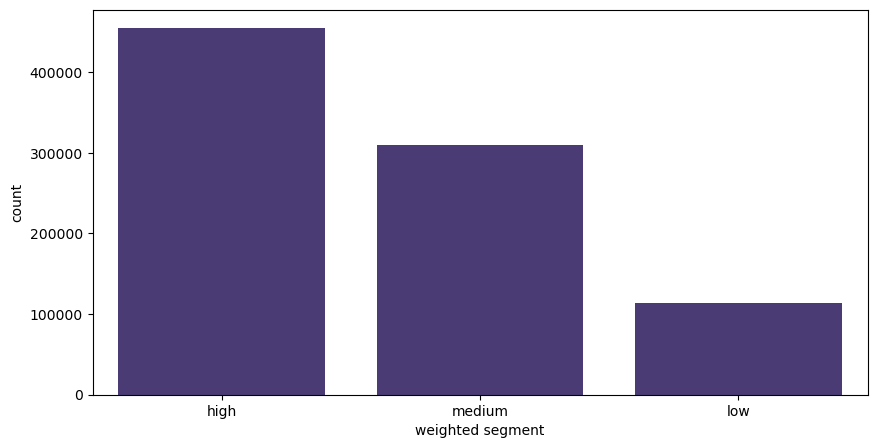

In [86]:
#Visualize weighted_segment

plt.figure(figsize = (10, 5))
sns.countplot(x = RFM_Table["weighted segment"])

### Customer Segmentation using Kmeans

#### Import libraries

In [89]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

#### Create DataFrame for clustering

In [91]:
RFM_data = RFM_Table.drop(["RFM_Group", "segments", "weighted score", "weighted segment"], axis=1)

In [92]:
RFM_data.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
CustomerID,,,,,,,
C1010011,26,2,5106.0,4,2,4,10
C1010012,69,1,1499.0,3,1,3,7
C1010014,76,2,1455.0,1,2,3,6
C1010018,37,1,30.0,4,1,1,6
C1010024,65,1,5000.0,3,1,4,8


#### Data Scaling



In [94]:
scaler = StandardScaler()

In [95]:
scaled_data = scaler.fit_transform(RFM_data)

In [96]:
scaled_data

array([[-1.99039095,  1.8173276 ,  0.45193522, ...,  1.82368347,
         1.34172808,  1.9711732 ],
       [ 0.83352617, -0.41084172, -0.04969314, ..., -0.41175149,
         0.45881674,  0.31595241],
       [ 1.2932336 ,  1.8173276 , -0.05581225, ...,  1.82368347,
         0.45881674, -0.23578785],
       ...,
       [ 0.5708362 , -0.41084172, -0.24063734, ..., -0.41175149,
        -1.30700594, -0.78752812],
       [-0.08588871, -0.41084172, -0.25120672, ..., -0.41175149,
        -1.30700594, -0.78752812],
       [-1.92471846, -0.41084172, -0.13925473, ..., -0.41175149,
         0.45881674,  0.86769268]])

#### Implementing Clustering Algorithm

In [98]:
model = KMeans(random_state = 1)

**Using distortion metric**

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=1),
                 k=(2, 10))

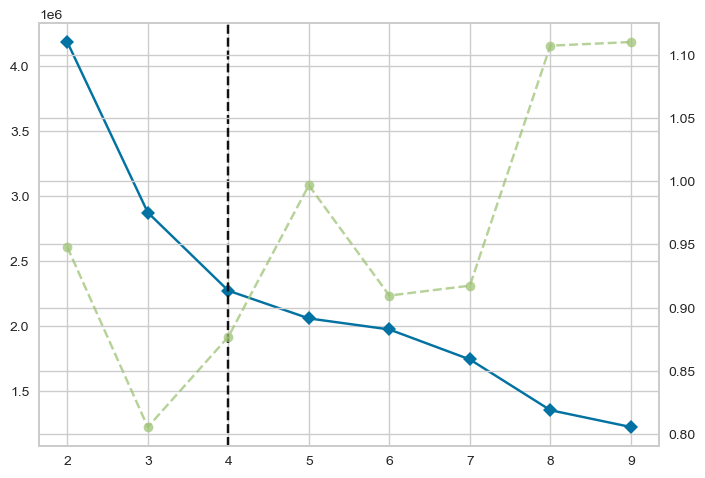

In [217]:
#finding the optimum number of cluster
plot_model = KElbowVisualizer(model, k = (2,10), metric = "distortion", timing = False)
plot_model.fit(scaled_data)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=1),
                 k=(2, 10), metric='calinski_harabasz')

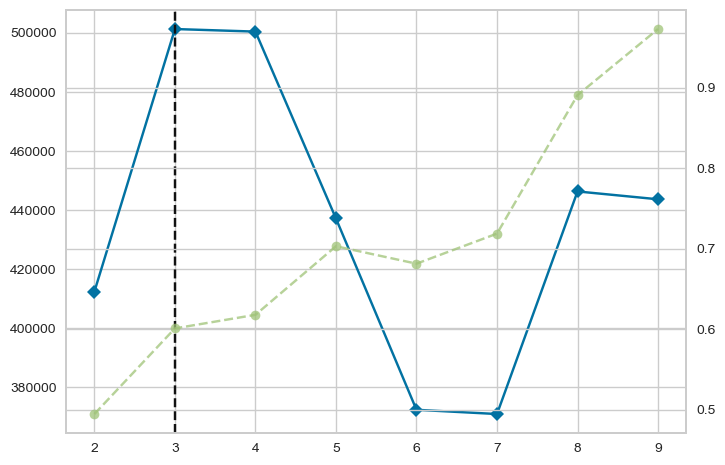

In [101]:
#Using calinski - harabasz metric to get the optimum number of cluster

plot_model_2 = KElbowVisualizer(model, k = (2,10), metric = "calinski_harabasz", timing = False)
plot_model_2.fit(scaled_data)

**Cluster assignment**

In [103]:
final_model = KMeans(random_state = 1, n_clusters = 3)
final_model.fit(scaled_data)

KMeans(n_clusters=3, random_state=1)

In [104]:
cluster_assignment = final_model.labels_
cluster_assignment

array([1, 0, 1, ..., 0, 0, 0])

In [105]:
RFM_data["Cluster"] = cluster_assignment

In [106]:
RFM_data

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Cluster
CustomerID,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,1
C1010012,69,1,1499.0,3,1,3,7,0
C1010014,76,2,1455.0,1,2,3,6,1
C1010018,37,1,30.0,4,1,1,6,0
C1010024,65,1,5000.0,3,1,4,8,0
...,...,...,...,...,...,...,...,...
C9099836,76,1,691.0,1,1,3,5,2
C9099877,37,1,222.0,4,1,2,7,0
C9099919,65,1,126.0,3,1,1,5,0


<Axes: xlabel='Recency', ylabel='Monetary'>

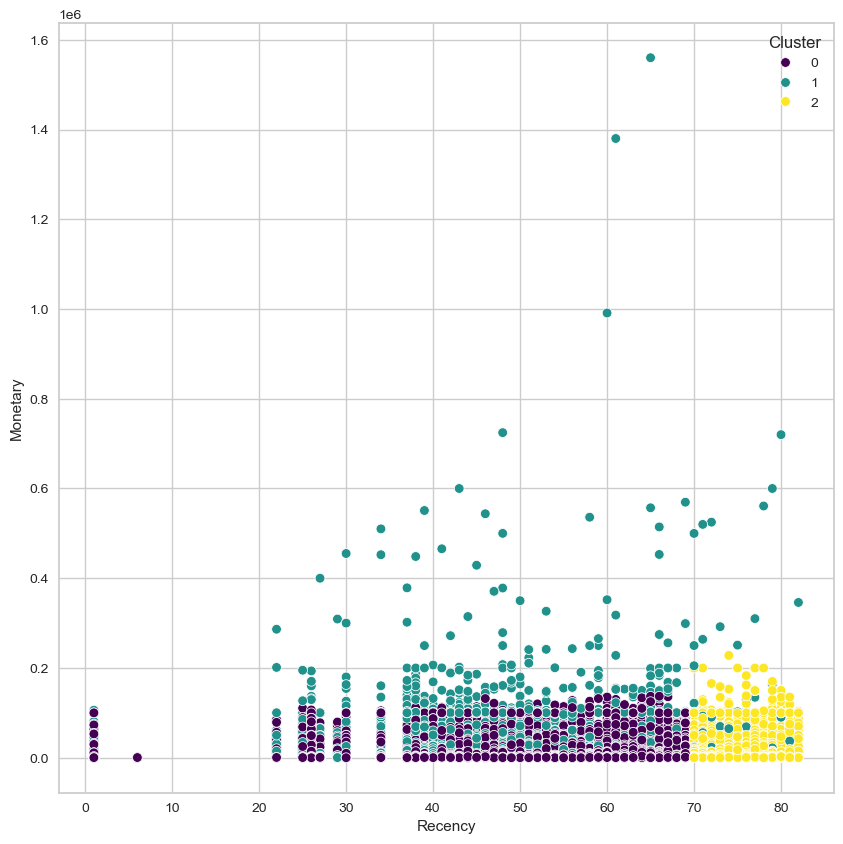

In [107]:
#Visualizing cluster to see how data are spread

plt.figure(figsize=(10,10))
sns.scatterplot(data = RFM_data, x = RFM_data["Recency"], y = RFM_data["Monetary"], hue = RFM_data["Cluster"], palette = "viridis")


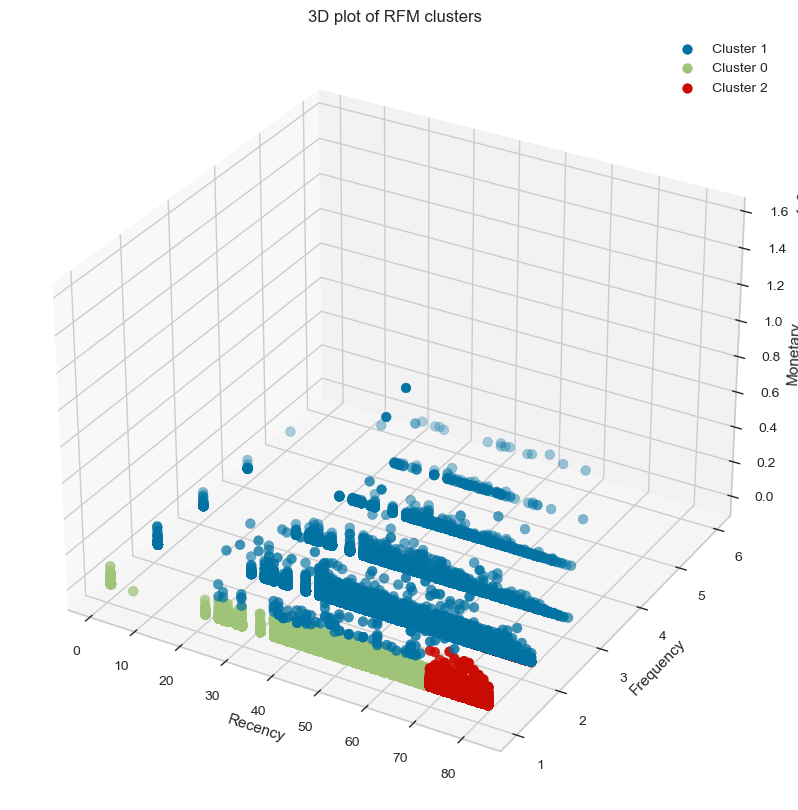

In [108]:
#Creating a 3D visualization
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = "3d")

color = ['b', 'g', 'r']
for cluster, color in zip(RFM_data["Cluster"].unique(), color):
    cluster_data = RFM_data[RFM_data["Cluster"] == cluster]
    ax.scatter(cluster_data["Recency"], cluster_data["Frequency"], cluster_data["Monetary"], c = color, s = 50, marker = 'o', label = f"Cluster {cluster}")

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")

ax.legend()
plt.title("3D plot of RFM clusters")
plt.show()

<Axes: xlabel='Cluster', ylabel='count'>

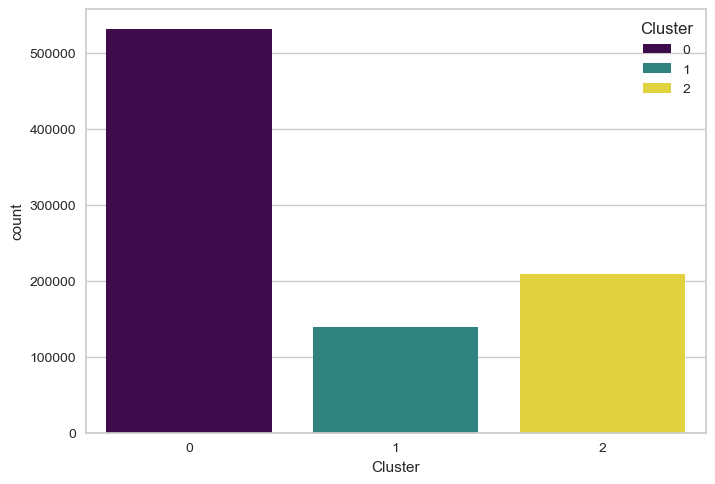

In [221]:
#Checking the count of every customer in each cluster

sns.countplot(x = RFM_data["Cluster"], hue=RFM_data["Cluster"], palette = "viridis")

In [110]:
#Draw out a descriptive statistics for every individual customer

for cluster in RFM_data["Cluster"].unique():
    print(f"cluster: {cluster}")
    print(RFM_data[RFM_data["Cluster"] == cluster].describe())

cluster: 1
            Recency      Frequency      Monetary        R_score  \
count  139416.00000  139416.000000  1.394160e+05  139416.000000   
mean       48.13157       2.144345  3.649155e+03       3.311980   
std        12.81325       0.395590  1.362337e+04       0.739437   
min         1.00000       1.000000  2.000000e+00       1.000000   
25%        40.00000       2.000000  6.790000e+02       3.000000   
50%        47.00000       2.000000  1.456000e+03       3.000000   
75%        57.00000       2.000000  3.087503e+03       4.000000   
max        82.00000       6.000000  1.560035e+06       4.000000   

             F_score        M_score      RFM_Score   Cluster  
count  139416.000000  139416.000000  139416.000000  139416.0  
mean        2.143133       3.258170       8.713283       1.0  
std         0.388043       0.862022       1.231181       0.0  
min         1.000000       1.000000       5.000000       1.0  
25%         2.000000       3.000000       8.000000       1.0  
50%    

In [111]:
#Draw a boxplot for every cluster

cluster_0 = RFM_data[RFM_data["Cluster"] == 0]
cluster_1 = RFM_data[RFM_data["Cluster"] == 1]
cluster_2 = RFM_data[RFM_data["Cluster"] == 2]

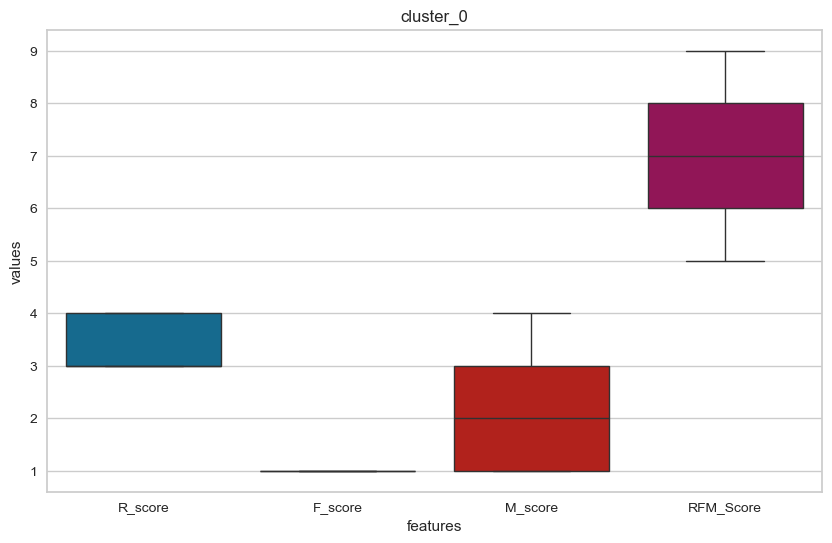

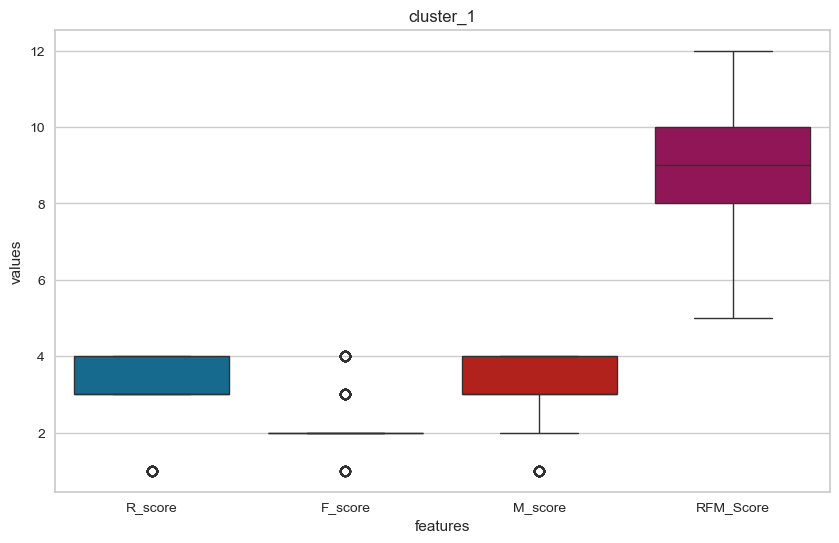

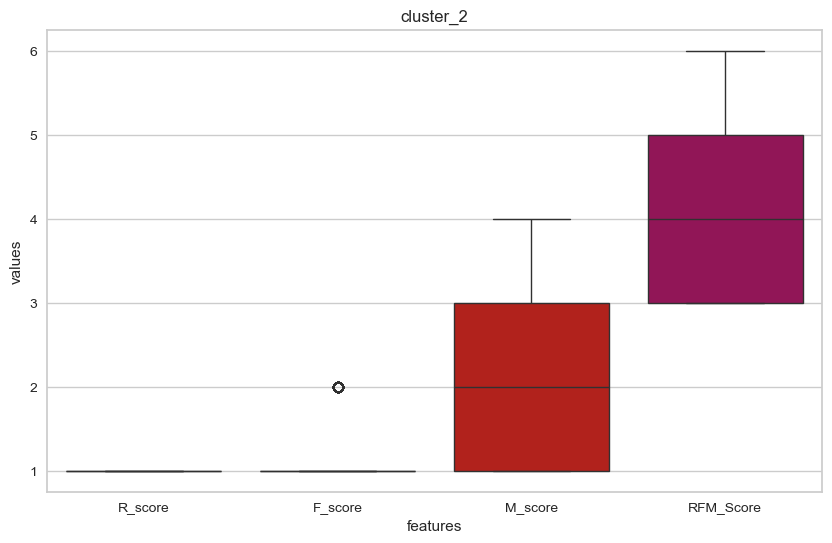

In [223]:
plt.figure(figsize=(10,6))
sns.boxplot(data = cluster_0[["R_score", "F_score", "M_score", "RFM_Score"]])
plt.title(f"cluster_0")
plt.ylabel("values")
plt.xlabel("features")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data = cluster_1[["R_score", "F_score", "M_score", "RFM_Score"]])
plt.title(f"cluster_1")
plt.ylabel("values")
plt.xlabel("features")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data = cluster_2[["R_score", "F_score", "M_score", "RFM_Score"]])
plt.title(f"cluster_2")
plt.ylabel("values")
plt.xlabel("features")
plt.show()

#### Cluster Description

* **Cluster 0:**
  * All customers in this cluster have **Low Recency score** (1 to 2)
  * All customers have **Low frequency score of 1**
  * 50% of customers monetary score are between 1 to 2 and the other 50% has M-score from 2 to 4. The average M-score of this cluster is 2
  * 75% of customers have RFM_score between 4 to 7
      

* **Cluster 1:**
  * All customers have **ver high recency score** between 3 to 4
  * All customers have **Low frequency score of 1**
  * 50% of customers monetary score are between 1 to 2 and the other 50% has M-score from 2 to 4. The average M-score of this cluster is 2. Same as cluster 0
  * 75% of customers have RFM_score between 6 to 9 

* **Cluster 2:**
  * 75% of customers have **high recency score** between 2 to 4 with average value of 3
  * All customers have **fairly high frequency score** of 2 with a few outliers having F-score of 1, 3 and 4
  * Almost all customers have **high monetary score** between 2 and 4 with a few outliers having an M-score of 1
  * 75% of customers have **high RFM score** between 8 to 12 and the remaining 25% have an RFM_score between 5 and 8